# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
# set up paths to created datasets
filepath_soft = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_rentals_soft.csv')
filepath_hard = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_rentals.csv')

In [3]:
# load data with soft deleted records
bike_rentals_soft_df = pd.read_csv(filepath_soft)

# adjust data types
bike_rentals_soft_df['Rental datetime'] = pd.to_datetime(bike_rentals_soft_df['Rental datetime'])
bike_rentals_soft_df['Return datetime'] = pd.to_datetime(bike_rentals_soft_df['Return datetime'])
bike_rentals_soft_df['Duration'] = pd.to_timedelta(bike_rentals_soft_df['Duration'])

In [4]:
# load data with hard deleted records
bike_rentals_hard_df = pd.read_csv(filepath_hard)
bike_rentals_hard_df['Rental datetime'] = pd.to_datetime(bike_rentals_hard_df['Rental datetime'])
bike_rentals_hard_df['Return datetime'] = pd.to_datetime(bike_rentals_hard_df['Return datetime'])
bike_rentals_hard_df['Duration'] = pd.to_timedelta(bike_rentals_hard_df['Duration'])

## Quick verification of datasets

### Dataset with soft deleted records

In [5]:
bike_rentals_soft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480640 entries, 0 to 480639
Data columns (total 17 columns):
Bike number                 480640 non-null int64
Rental datetime             480640 non-null datetime64[ns]
Return datetime             480640 non-null datetime64[ns]
Rental station              480640 non-null object
Return station              480640 non-null object
Duration                    480640 non-null timedelta64[ns]
Rental station latitude     446274 non-null float64
Rental station longitude    446274 non-null float64
Return station latitude     449682 non-null float64
Return station longitude    449682 non-null float64
IsDeleted                   480640 non-null bool
Season                      480640 non-null int64
Holidays                    480640 non-null bool
Rental day of week          480640 non-null int64
Rental hour                 480640 non-null int64
Rental month                480640 non-null int64
Distance                    421295 non-null float64
d

In [6]:
# deleted records may contain NaN values
bike_rentals_soft_df[bike_rentals_soft_df['IsDeleted'] == True].isnull().sum()

Bike number                     0
Rental datetime                 0
Return datetime                 0
Rental station                  0
Return station                  0
Duration                        0
Rental station latitude     34366
Rental station longitude    34366
Return station latitude     30958
Return station longitude    30958
IsDeleted                       0
Season                          0
Holidays                        0
Rental day of week              0
Rental hour                     0
Rental month                    0
Distance                    59345
dtype: int64

In [7]:
# make sure there are no NaN values in records that are left
assert sum(bike_rentals_soft_df[bike_rentals_soft_df['IsDeleted'] == False].isnull().sum()) == 0

In [8]:
bike_rentals_soft_df.head(3)

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance
0,57719,2019-06-26 00:00:10,2019-06-26 00:06:19,Skarbowców / Wietrzna,Krzycka / Aleja Karkonoska (Park Południowy),00:06:09,51.073290,16.994850,51.074992,17.007058,False,3,False,3,0,6,0.9
1,650480,2019-06-26 00:00:13,2019-06-26 00:06:59,Rynek,Plac Legionów,00:06:46,51.109782,17.030175,51.104413,17.022536,False,3,False,3,0,6,0.8
2,650988,2019-06-26 00:00:15,2019-06-26 00:13:32,Poza oficjalną stacją,Wałbrzyska - pętla tramwajowa,00:13:17,NaN,NaN,51.065777,16.988575,True,3,False,3,0,6,NaN


### Dataset with hard deleted records

In [9]:
bike_rentals_hard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345999 entries, 0 to 345998
Data columns (total 16 columns):
Bike number                 345999 non-null int64
Rental datetime             345999 non-null datetime64[ns]
Return datetime             345999 non-null datetime64[ns]
Rental station              345999 non-null object
Return station              345999 non-null object
Duration                    345999 non-null timedelta64[ns]
Rental station latitude     345999 non-null float64
Rental station longitude    345999 non-null float64
Return station latitude     345999 non-null float64
Return station longitude    345999 non-null float64
Season                      345999 non-null int64
Holidays                    345999 non-null bool
Rental day of week          345999 non-null int64
Rental hour                 345999 non-null int64
Rental month                345999 non-null int64
Distance                    345999 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(5), in

In [10]:
# deleted records must not contain values
bike_rentals_hard_df.isnull().sum()

Bike number                 0
Rental datetime             0
Return datetime             0
Rental station              0
Return station              0
Duration                    0
Rental station latitude     0
Rental station longitude    0
Return station latitude     0
Return station longitude    0
Season                      0
Holidays                    0
Rental day of week          0
Rental hour                 0
Rental month                0
Distance                    0
dtype: int64

## Visual inspection of soft deleted records

In [11]:
print(f"Number of soft deleted records: {bike_rentals_soft_df[bike_rentals_soft_df['IsDeleted'] == True].shape[0]}")

Number of soft deleted records: 134641


In [12]:
bike_rentals_soft_df.loc[bike_rentals_soft_df['Rental station latitude'].isnull(), 'Rental station'].value_counts()

Poza oficjalną stacją              30455
Świeradowska (Ferio Gaj)            3155
Fabryczna (WSB)                      373
Pełczyńska / stacja kolejowa         193
.RELOKACYJNA A1-4                     75
Teststation IT - Adrian (VP)          29
BIKE                                  21
0, 0                                  10
plac Nankiera                          6
recording_80356921                     3
BIKE 57509                             2
.GOTOWE DO REZERWACJI                  2
Bierutowska 48                         2
Generała Stanisława Kopańskiego        1
Legnicka                               1
Sucha 2                                1
Stanisława Worcella 8                  1
#RELOKACYJNA                           1
Eugeniusza Kwiatkowskiego              1
Mydlana                                1
Tadeusza Kościuszki 80a                1
Łąkowa                                 1
Główna 1a                              1
Podwale 73                             1
Krzemieniecka   

In [13]:
bike_rentals_soft_df.loc[bike_rentals_soft_df['Return station latitude'].isnull(), 'Return station'].value_counts()

Poza oficjalną stacją              27103
Świeradowska (Ferio Gaj)            3194
Fabryczna (WSB)                      375
Pełczyńska / stacja kolejowa         175
Teststation IT - Adrian (VP)          28
BIKE                                  15
.RELOKACYJNA A1-4                     13
0, 0                                   7
plac Nankiera                          6
recording_80356921                     3
BIKE 57509                             2
Bierutowska 48                         2
Mydlana                                1
Wilkszyńska 55                         1
Sucha 2                                1
Legnicka                               1
Centralna 28                           1
Łąkowa                                 1
Stanisława Worcella 8                  1
Sołtysowicka 27e                       1
Eugeniusza Kwiatkowskiego              1
Generała Stanisława Kopańskiego        1
Główna 1a                              1
Buforowa 4                             1
Kwidzyńska 4    

### Rentals returned to the same bike station

In [14]:
idx = (bike_rentals_soft_df['IsDeleted'] == True) & \
      (bike_rentals_soft_df['Rental station'] == bike_rentals_soft_df['Return station'])
print(f"Number of records: {bike_rentals_soft_df.loc[idx, :].shape[0]}")

Number of records: 80697


### Data time span

In [15]:
bike_rentals_soft_df['Rental datetime'].min()

Timestamp('2019-06-26 00:00:10')

In [16]:
bike_rentals_soft_df['Rental datetime'].max()

Timestamp('2019-11-07 23:51:00')

### Inspection

In [17]:
bike_rentals_soft_df.loc[idx, :]

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance
4,650067,2019-06-26 00:00:40,2019-06-26 00:04:40,Powstańców Śląskich (Arkady Wrocławskie),Powstańców Śląskich (Arkady Wrocławskie),00:04:00,51.099713,17.027905,51.099713,17.027905,True,3,False,3,0,6,0.0
5,650020,2019-06-26 00:00:52,2019-06-26 00:01:41,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:49,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
6,650072,2019-06-26 00:01:04,2019-06-26 00:01:58,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:54,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
7,57855,2019-06-26 00:01:22,2019-06-26 00:19:56,Kościuszki / Pułaskiego,Kościuszki / Pułaskiego,00:18:34,51.100400,17.045083,51.100400,17.045083,True,3,False,3,0,6,0.0
9,57856,2019-06-26 00:01:57,2019-06-26 00:02:24,Kamienna / Borowska (Aquapark),Kamienna / Borowska (Aquapark),00:00:27,51.088908,17.034051,51.088908,17.034051,True,3,False,3,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480631,57978,2019-11-07 23:44:00,2019-11-07 23:44:00,Powstańców Śląskich (Arkady Wrocławskie),Powstańców Śląskich (Arkady Wrocławskie),00:00:00,51.099713,17.027905,51.099713,17.027905,True,4,False,4,23,11,0.0
480634,650289,2019-11-07 23:46:00,2019-11-07 23:48:00,Poza oficjalną stacją,Poza oficjalną stacją,00:02:00,NaN,NaN,NaN,NaN,True,4,False,4,23,11,NaN
480637,650289,2019-11-07 23:49:00,2019-11-07 23:55:00,Poza oficjalną stacją,Poza oficjalną stacją,00:06:00,NaN,NaN,NaN,NaN,True,4,False,4,23,11,NaN
480638,650182,2019-11-07 23:49:00,2019-11-07 23:50:00,Nyska / Jesionowa,Nyska / Jesionowa,00:01:00,51.087290,17.051150,51.087290,17.051150,True,4,False,4,23,11,0.0


In [18]:
bike_rentals_soft_df.loc[ (bike_rentals_soft_df['Rental station'] == bike_rentals_soft_df['Return station'])
                    & (bike_rentals_soft_df['Duration'] < '00:01:00')]

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance
5,650020,2019-06-26 00:00:52,2019-06-26 00:01:41,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:49,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
6,650072,2019-06-26 00:01:04,2019-06-26 00:01:58,Plac Grunwaldzki / Polaka,Plac Grunwaldzki / Polaka,00:00:54,51.110415,17.055591,51.110415,17.055591,True,3,False,3,0,6,0.0
9,57856,2019-06-26 00:01:57,2019-06-26 00:02:24,Kamienna / Borowska (Aquapark),Kamienna / Borowska (Aquapark),00:00:27,51.088908,17.034051,51.088908,17.034051,True,3,False,3,0,6,0.0
17,650544,2019-06-26 00:02:50,2019-06-26 00:03:47,Wróblewskiego (Teki),Wróblewskiego (Teki),00:00:57,51.104110,17.084711,51.104110,17.084711,True,3,False,3,0,6,0.0
18,650601,2019-06-26 00:03:04,2019-06-26 00:04:03,Drobnera / Dubois,Drobnera / Dubois,00:00:59,51.117032,17.033499,51.117032,17.033499,True,3,False,3,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480575,57572,2019-11-07 23:08:00,2019-11-07 23:08:00,Krzywoustego - Rynek Psie Pole,Krzywoustego - Rynek Psie Pole,00:00:00,51.147339,17.114520,51.147339,17.114520,True,4,False,4,23,11,0.0
480580,650853,2019-11-07 23:11:00,2019-11-07 23:11:00,Gliniana / Gajowa,Gliniana / Gajowa,00:00:00,51.091520,17.040330,51.091520,17.040330,True,4,False,4,23,11,0.0
480616,651020,2019-11-07 23:36:00,2019-11-07 23:36:00,Plac Legionów,Plac Legionów,00:00:00,51.104413,17.022536,51.104413,17.022536,True,4,False,4,23,11,0.0
480618,650853,2019-11-07 23:37:00,2019-11-07 23:37:00,Gliniana / Gajowa,Gliniana / Gajowa,00:00:00,51.091520,17.040330,51.091520,17.040330,True,4,False,4,23,11,0.0


### Duration

In [19]:
total_seconds = bike_rentals_soft_df.loc[idx, 'Duration'].dt.total_seconds();

print(f"Min: {total_seconds.min()}, Max: {total_seconds.max()}")
print(f"Avg: {total_seconds.mean()}, Std: {total_seconds.std()}")

Min: 0.0, Max: 56135.0
Avg: 520.3914767587395, Std: 1395.363195091565


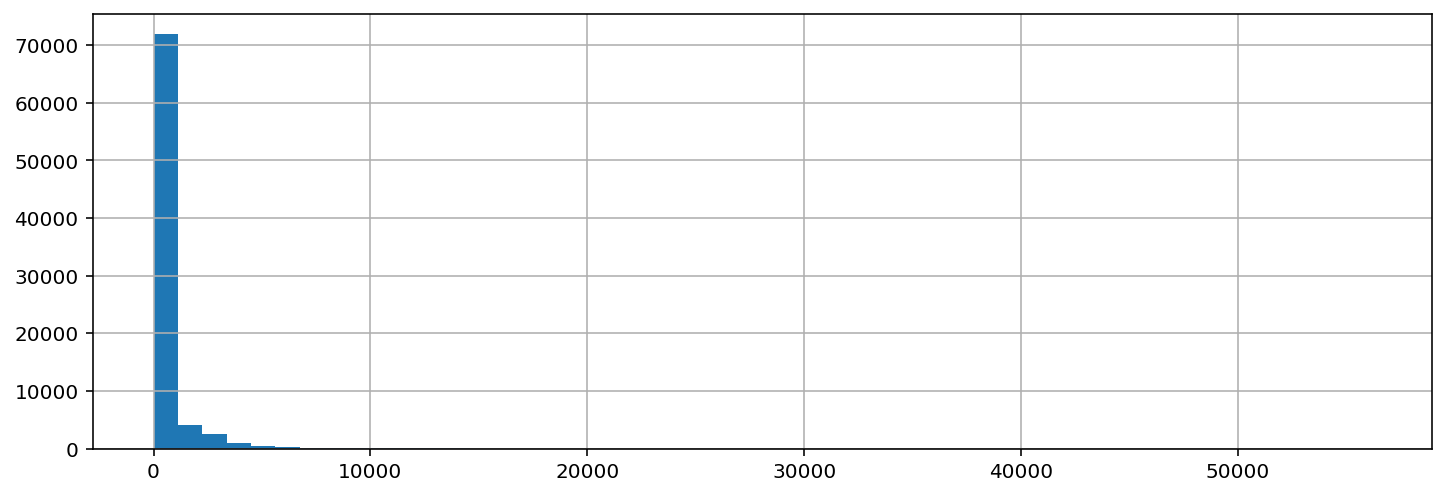

In [20]:
total_seconds.hist(bins=50, figsize=(12, 4));

### Geographical dispersion

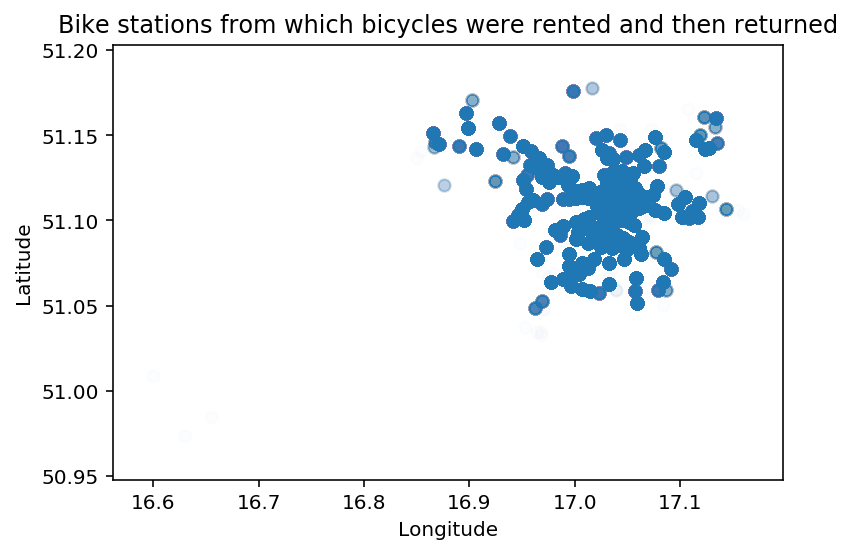

In [21]:
plt.scatter(x=bike_rentals_soft_df.loc[idx, 'Rental station longitude'].values, 
            y=bike_rentals_soft_df.loc[idx, 'Rental station latitude'].values, 
            alpha=0.01)
plt.title('Bike stations from which bicycles were rented and then returned')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();

## Visual inspection of hard deleted records

### Rental bike stations

In [22]:
bike_rentals_hard_df['Rental station'].value_counts()

Rondo Reagana                               7406
Dworzec Główny, południe                    7236
Plac Dominikański (Galeria Dominikańska)    7142
Dworzec Główny                              6630
Rynek                                       6200
                                            ... 
Waniliowa / Cynamonowa                       161
Strachocińska / Wieśniacza                   137
Miłoszycka / Swojczycka                      123
Księgarska / Dekarska / Zduńska               76
Jerzmanowska                                  52
Name: Rental station, Length: 202, dtype: int64

In [23]:
bike_rentals_hard_df['Rental station'].unique()

array(['Skarbowców / Wietrzna', 'Rynek', 'Plac Uniwersytecki (UWr)',
       'Nowowiejska / Wyszyńskiego', 'al. Armii Krajowej / Bardzka',
       'Drobnera / Plac Bema', 'Drobnera / Dubois',
       'Plac Dominikański (Galeria Dominikańska)', 'Wróblewskiego (Teki)',
       'Legnicka / Wejherowska', 'Kamienna / Borowska (Aquapark)',
       'Zaporoska / Grabiszyńska', 'Kamienna / Tomaszowska',
       'Plac Grunwaldzki / Polaka', 'Ślężna / Aleja Wiśniowa',
       'Plac Legionów', 'Krzycka / Aleja Karkonoska (Park Południowy)',
       'Plac Strzegomski / Poznańska',
       'Plac Jana Pawła II (Akademia Muzyczna)',
       'Sienkiewicza / Piastowska', 'Nowowiejska / Górnickiego',
       'Zwycięska / Ołtaszyńska', 'al. Armii Krajowej / Borowska',
       'Pereca / Grabiszyńska', 'Legnicka / Zachodnia',
       'Olszewskiego, pętla tramwajowa', 'Na Ostatnim Groszu',
       'Zachodnia / Poznańska', 'Wałbrzyska - pętla tramwajowa',
       'Jedności Narodowej / Wyszyńskiego', 'Żmigrodzka / Broniewski

### Return bike stations

In [25]:
bike_rentals_hard_df['Return station'].value_counts()

Plac Dominikański (Galeria Dominikańska)    7101
Dworzec Główny, południe                    7027
Rondo Reagana                               7011
Dworzec Główny                              6634
Rynek                                       6187
                                            ... 
Waniliowa / Cynamonowa                       165
Stabłowicka                                  140
Miłoszycka / Swojczycka                      125
Księgarska / Dekarska / Zduńska               87
Jerzmanowska                                  46
Name: Return station, Length: 202, dtype: int64

In [26]:
bike_rentals_hard_df['Return station'].unique()

array(['Krzycka / Aleja Karkonoska (Park Południowy)', 'Plac Legionów',
       'Legnicka / Wejherowska', 'Kołłątaja / Podwale', 'Konduktorska',
       'Pereca / Grabiszyńska', 'Kościuszki / Pułaskiego',
       'Plac Kościuszki (Renoma)', 'Olszewskiego, pętla tramwajowa',
       'Legnicka / Zachodnia', 'Nowowiejska / Górnickiego',
       'al. Armii Krajowej / Borowska', 'Komandorska / Kamienna',
       'Kościuszki / Komuny Paryskiej / Zgodna',
       'Nowowiejska / Wyszyńskiego', 'Czekoladowa / Wałbrzyska',
       'Lotnicza / Bajana', 'Nowowiejska / Jedności Narodowej',
       'Powstańcow Śląskich / Aleja Hallera', 'Rondo Reagana',
       'Ślężna / Kamienna (Uniw. Ekonomiczny)', 'Tarnogajska / Klimasa',
       'Komandorska / Sanocka', 'Gliniana / Gajowa',
       'Plac Powstańców Śląskich', 'Popowicka / Niedźwiedzia',
       'Plac Świętego Macieja / Trzebnicka', 'Sienkiewicza / Piastowska',
       'Marca Polo (Olimpia Port)', 'Lotnicza / Metalowców',
       'Obornicka / Bałtycka', 'Ślężn